# 1. Cargar y Explorar los Datos:

* Descarga el dataset y cárgalo en un DataFrame de Pandas.
* Realiza una exploración inicial de los datos para entender las variables disponibles.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = "/content/drive/MyDrive/Bootcamp/BBDD/2018.csv"
df = pd.read_csv(path)

In [31]:
# Acá obtengo información general del Data Frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [32]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [33]:
# A continuación utilizo describe() que me permite visualizar los datos estadísticos del DataFrame
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.50,45.18,1.0,39.75,78.50,117.25,156.00
Score,156.0,5.38,1.12,2.9,4.45,5.38,6.17,7.63
GDP per capita,156.0,0.89,0.39,0.0,0.62,0.95,1.20,2.10
Social support,156.0,1.21,0.30,0.0,1.07,1.25,1.46,1.64
Healthy life expectancy,156.0,0.60,0.25,0.0,0.42,0.64,0.78,1.03
Freedom to make life choices,156.0,0.45,0.16,0.0,0.36,0.49,0.58,0.72
Generosity,156.0,0.18,0.10,0.0,0.11,0.17,0.24,0.60
Perceptions of corruption,156.0,0.11,0.10,0.0,0.05,0.08,0.14,0.46


In [34]:
# Ver cuántos son los nulos que hay por columna
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


* Con esto comprobamos que la columna Perceptions of corruption tiene 1 dato nulo.
* Como es solo un valor que falta de un total de 156, rellenaré con la media.

In [35]:
Promedio_pcorrupcion = df["Perceptions of corruption"].mean()
df["Perceptions of corruption"] = df["Perceptions of corruption"].fillna(Promedio_pcorrupcion)

In [36]:
# Verifico que ya no haya nulos.
df.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


# 2. Crear Histogramas:

* Crea histogramas para las variables Score, GDP per capita, Healthy life expectancy y Freedom to make life choices.

* Personaliza los histogramas con colores, bordes y ajustes de transparencia.


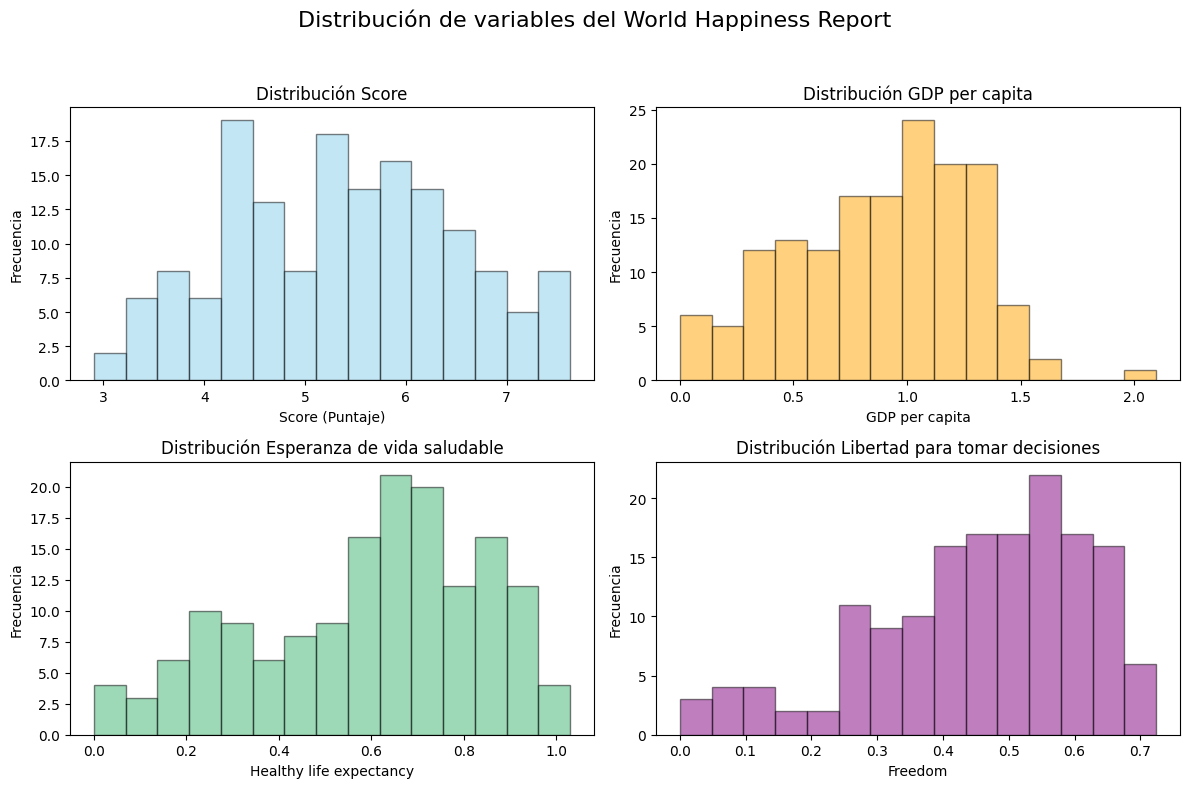

In [37]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribución de variables de World Happiness Report", fontsize=16)

# Crear Histograma n°1: Score.
axs[0, 0].hist(df["Score"], bins=15, color='skyblue', edgecolor='black', alpha=0.5)
axs[0, 0].set_title("Distribución Score")
axs[0, 0].set_xlabel("Score (Puntaje)")
axs[0, 0].set_ylabel("Frecuencia")

# Crear Histograma n°2: GDP per capita.
axs[0, 1].hist(df["GDP per capita"], bins=15, color='orange', edgecolor='black', alpha=0.5)
axs[0, 1].set_title("Distribución GDP per capita")
axs[0, 1].set_xlabel("GDP per capita")
axs[0, 1].set_ylabel("Frecuencia")

# Crear Histograma n°3: Healthy life expectancy.
axs[1, 0].hist(df["Healthy life expectancy"], bins=15, color='mediumseagreen', edgecolor='black', alpha=0.5)
axs[1, 0].set_title("Distribución Esperanza de vida saludable")
axs[1, 0].set_xlabel("Healthy life expectancy")
axs[1, 0].set_ylabel("Frecuencia")

# Crear Histograma n°4: Freedom to make life choices.
axs[1, 1].hist(df["Freedom to make life choices"], bins=15, color='purple', edgecolor='black', alpha=0.5)
axs[1, 1].set_title("Distribución Libertad para tomar decisiones")
axs[1, 1].set_xlabel("Freedom")
axs[1, 1].set_ylabel("Frecuencia")

# Ajustar el layout para que no se sobrepongan los elementos.
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar.
plt.show()


Conclusiones:
*  El ajuste de transparencia solicitado se ajusta con el parámetro alpha, en este caso utilicé 0.5 ya que es un valor intermedio, sin recargar el color y no pierde visibilidad.

# 3. Crear Boxplots:

* Crea boxplots para las mismas variables para visualizar la mediana, el rango intercuartil y los valores atípicos.
*Personaliza los boxplots con diferentes colores y estilos.

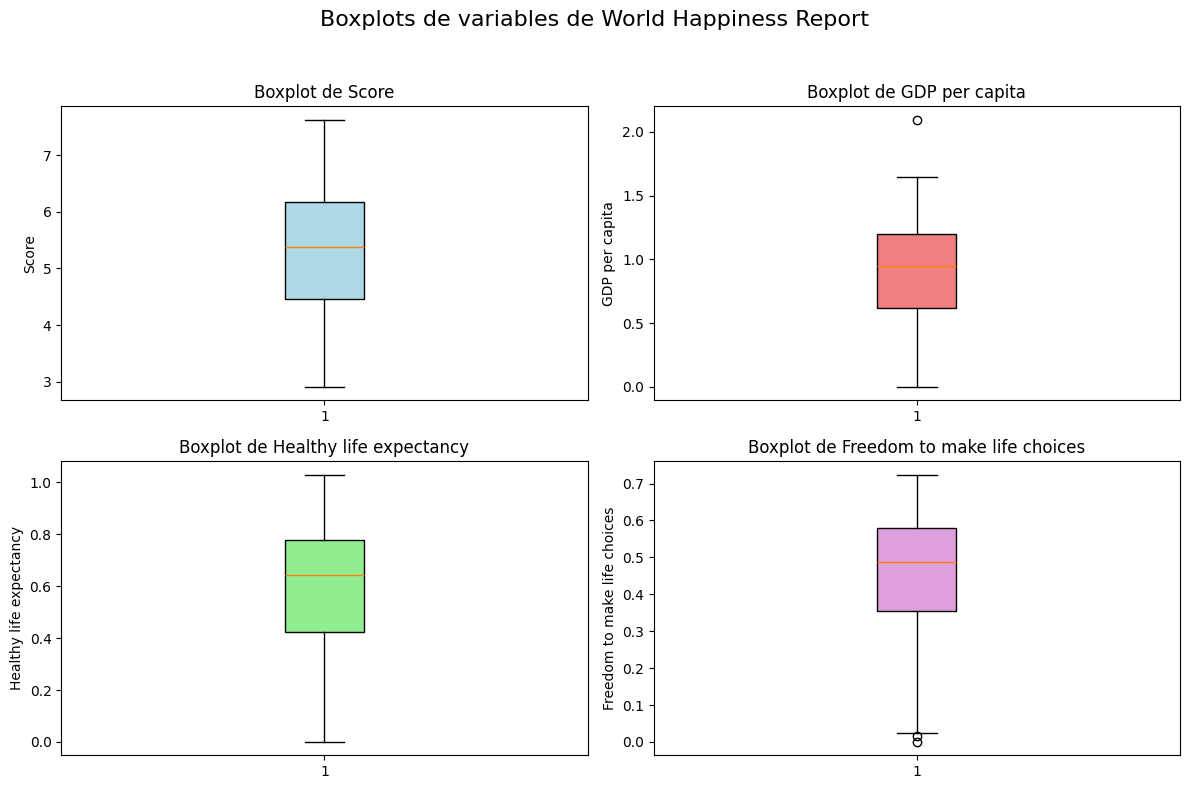

In [39]:
variables = ["Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]
colores = ["lightblue", "lightcoral", "lightgreen", "plum"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Boxplots de variables de World Happiness Report", fontsize=16)

for i, var in enumerate(variables):
    fila = i // 2
    col = i % 2
    axs[fila, col].boxplot(df[var], patch_artist=True, boxprops=dict(facecolor=colores[i]))
    axs[fila, col].set_title(f"Boxplot de {var}")
    axs[fila, col].set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.95])

#Mostrar.
plt.show()


# 4. Análisis Combinado:
* Combina los histogramas y los boxplots en una sola figura para cada variable.
* Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos.

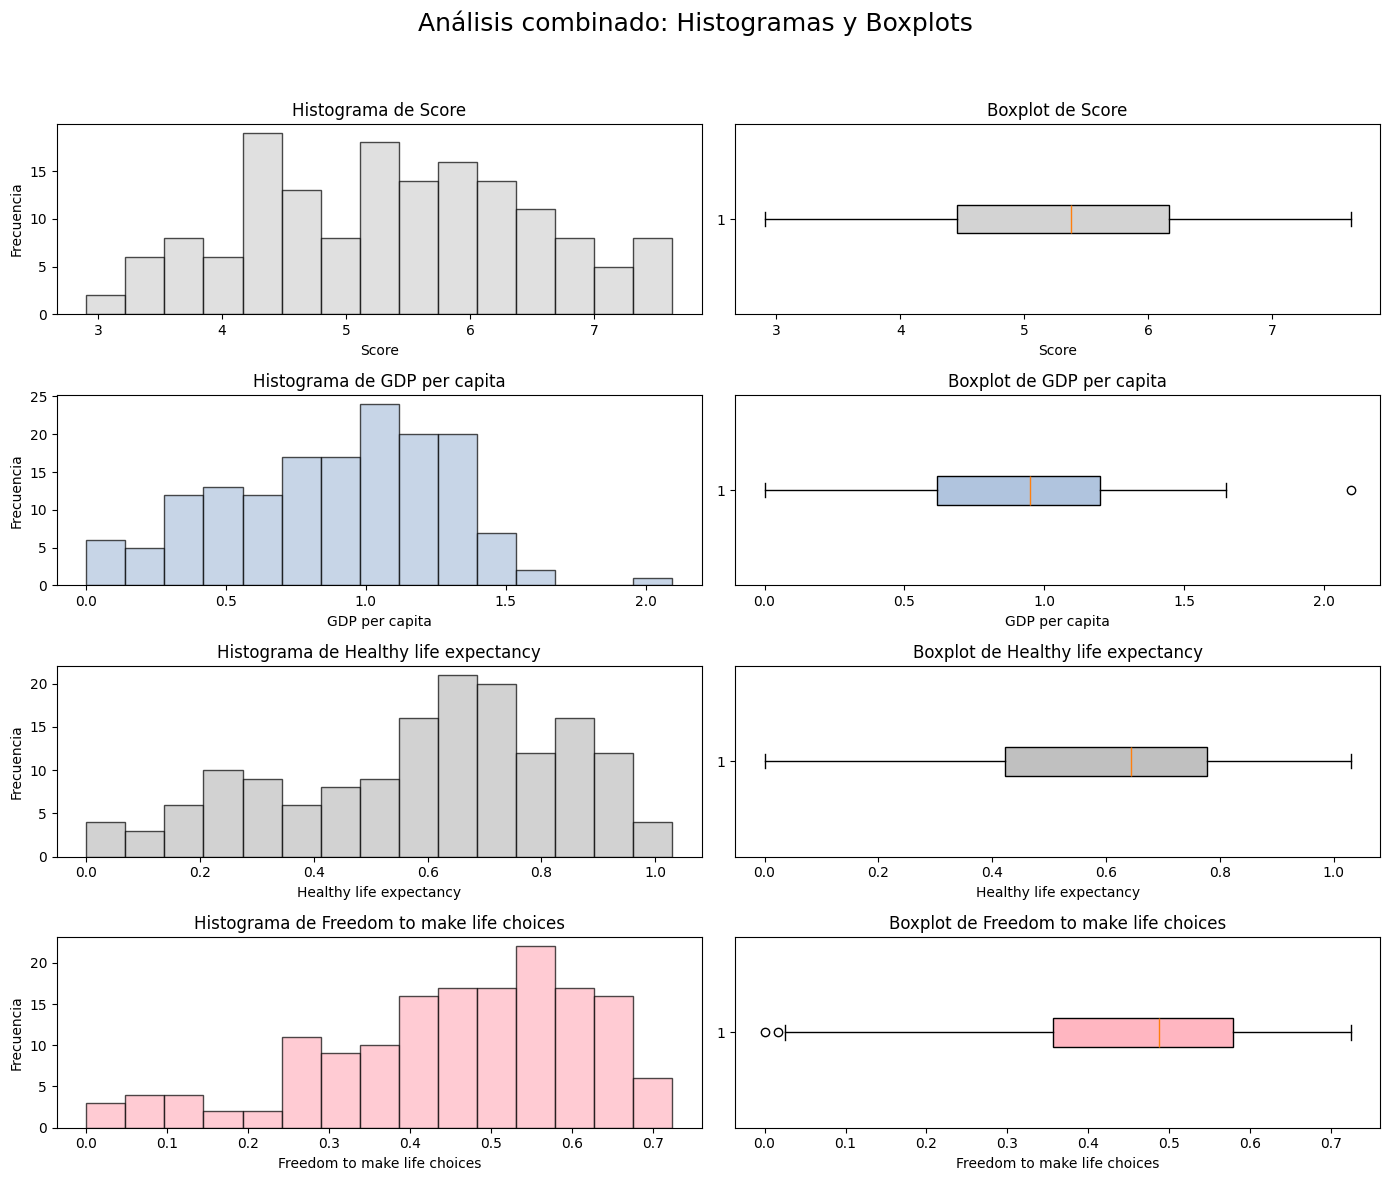

In [42]:
import matplotlib.pyplot as plt

# Variables y colores neutros
variables = ["Score", "GDP per capita", "Healthy life expectancy", "Freedom to make life choices"]
colores = ["lightgray", "lightsteelblue", "silver", "lightpink"]

# Crear figura
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
fig.suptitle("Análisis combinado: Histogramas y Boxplots", fontsize=18)

# Loop para graficar cada variable
for i, (var, color) in enumerate(zip(variables, colores)):
    # Histograma (izquierda)
    axs[i, 0].hist(df[var], bins=15, color=color, edgecolor='black', alpha=0.7)
    axs[i, 0].set_title(f"Histograma de {var}")
    axs[i, 0].set_xlabel(var)
    axs[i, 0].set_ylabel("Frecuencia")

    # Boxplot horizontal (derecha)
    axs[i, 1].boxplot(df[var], vert=False, patch_artist=True,
                      boxprops=dict(facecolor=color, color='black'))
    axs[i, 1].set_title(f"Boxplot de {var}")
    axs[i, 1].set_xlabel(var)

# Ajustar espacios
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#ANALISIS:

* Las variables nos muestran diferentes grados de simetría y dispersión, en el caso de Score, Healthy life expectancy y Freedom tienen distribuciones más homogéneas.

* En el Gráfico de Puntaje de Felicidad podemos observar que la mediana está en 5,5. su punto minimo en alrededor de 3 y el máximo sobre 7.0

* En el caso de GDP per capita nos muestra la mayor desigualdad, El PIB está más concentrado en niveles bajos o intermedios, mientras que una minoría de los países están en el rango superior.
* En el caso del gráfico tipo boxplot de GDP per capita podemos observar que tiene una mediana baja y valores atípicos arriba.

* En el Gráfico de Healty life expectancy los valores van de 0.1 a superior a 1.0 con una mediana sobre 0.6, lo que nos llevaría a pensar que al tener una expectativa de vida sana alta las personas son más felices.

* En el boxplot de freedom to make choices podemos observar que hay datos que se salen del rango hacia abajo, lo que nos lleva a pensar que las personas de esos países tiene pocas o casi nada de opciones para tomar decisiones de vida, lo que podría influir en menos niveles de felicidad.